# Standard Analysis Notebook
CellPLATO


In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Finished running cellPLATO initialization and loaded config.
Initializing:  consistency_test_btrack_v2
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  Z://Collaboration_data/Mace_Lab/my_generated/cellPLATO(dev)/consistency_test_btrack_v2\2022-07-19_11-18-19-493697\plots/
Using unique embedding per dataset shortname:  consistency_test_btrack_v2
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Using corresponding CTL_SHORTLABEL:  WT Day 0  for condition:  Condition_Day0_Stablized WTEL08_B5
Dataset in current notebook:  consistency_test_btrack_v2
Finished initializing data_processing
Finished intializing visualizations


Finished initializing cellPLATO


In [2]:
OVERWRITE_DATAFRAMES = False

In [3]:
if os.path.exists(cp.SAVED_DATA_PATH + 'dr_df.csv'):
    print(cp.SAVED_DATA_PATH + 'dr_df_.csv',' exists, loading dataframes...')
    
    # Load existing (preprocessed) data
    comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')
    tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
else:
    
    print('File doesnt exist.')

Z://Collaboration_data/Mace_Lab/my_generated/cellPLATO(dev)/consistency_test_btrack_v2\saved_data/dr_df_.csv  exists, loading dataframes...


# Load the data from h5 files in folder structure

In [4]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)

Condition  \
0  Condition_Day0_Stablized WTEL08_B5   
1  Condition_Day0_Stablized WTEL08_B5   
2  Condition_Day0_Stablized WTEL08_B5   
3  Condition_Day7_Stablized WTEL08_B5   
4  Condition_Day7_Stablized WTEL08_B5   
5  Condition_Day7_Stablized WTEL08_B5   

                                   Experiment  \
0  Day0_Stablized WTEL08_B5_1_mask_avg_tracks   
1  Day0_Stablized WTEL08_B5_2_mask_avg_tracks   
2  Day0_Stablized WTEL08_B5_3_mask_avg_tracks   
3  Day7_Stablized WTEL08_B5_1_mask_avg_tracks   
4  Day7_Stablized WTEL08_B5_2_mask_avg_tracks   
5  Day7_Stablized WTEL08_B5_3_mask_avg_tracks   

                                 Replicate_ID Condition_shortlabel  \
0  Day0_Stablized WTEL08_B5_1_mask_avg_tracks             WT Day 0   
1  Day0_Stablized WTEL08_B5_2_mask_avg_tracks             WT Day 0   
2  Day0_Stablized WTEL08_B5_3_mask_avg_tracks             WT Day 0   
3  Day7_Stablized WTEL08_B5_1_mask_avg_tracks             WT Day 7   
4  Day7_Stablized WTEL08_B5_2_mask_avg_tracks             WT Day 7   
5  Day7_Stablized WTEL08_B5_3_mask_avg_tracks             WT Day 7   

  Replicate_shortlabel  
0           WT Day 0_0  
1           WT Day 0_1  
2           WT Day 0_2  
3           WT Day 7_0  
4           WT Day 7_1  
5           WT Day 7_2

##### Optionally, override the experiment list in the config and select a subset.

In [5]:
# Local overide to CONDITION_SHORTLABELS in Notebook.
# conditions_to_include = ['WT_20x', 'KO_20x','WT_100x', 'KO_100x']
# conditions_to_include = ['WT_20x', 'KO_20x']
# conditions_to_include = ['WT_100x', 'KO_100x']

# conditions_to_include = ['WT Day 0', 'WT Day 7']
# # conditions_to_include = ['WT Day 0']
# # conditions_to_include = ['WT Day 7']

# # Filter exp_list using CONDITION_SHORTLABELS
# exp_list = exp_list[exp_list['Condition_shortlabel'].isin(conditions_to_include)]
# display(exp_list)

In [6]:
# Before running dr_pipeline, check if the file already exists in the local namespace
if 'comb_df' in locals():
    
    print('Using loaded comb_df')
    
else: 

    # Load, process and combine the dataframes (including segmentation and migration calculations)
    comb_df = cp.combine_dataframes(exp_list)
    comb_df = cp.measurement_pipeline(comb_df)

Using loaded comb_df


In [7]:
dr_df = cp.dr_pipeline(comb_df, dr_factors=cp.DR_FACTORS) 

Running dr_pipeline...
tSNE perplexity =  185
UMAP nearest neighbors =  10  min distance =  0.5
Using standardized factors for dimensionality reduction, matrix shape:  (9334, 28)
Using openTSNE with perplexity =  185
Using openTSNE to calculate new embedding for input data.
Embedding shape:  (9334, 2)


## Filtering data (upstream of dimensionality reduction)

Applying filters:
{'area': (0, 10000), 'ntpts': (0, 1000)}
Beginning filtering ...
9334  data points from  1006  cells
Applying filters to entire cell trajectory:
{'area': (0, 10000), 'ntpts': (0, 1000)}
...
 Finished filtering. Resulting dataframe contains:
9334  data points from  1006  cells


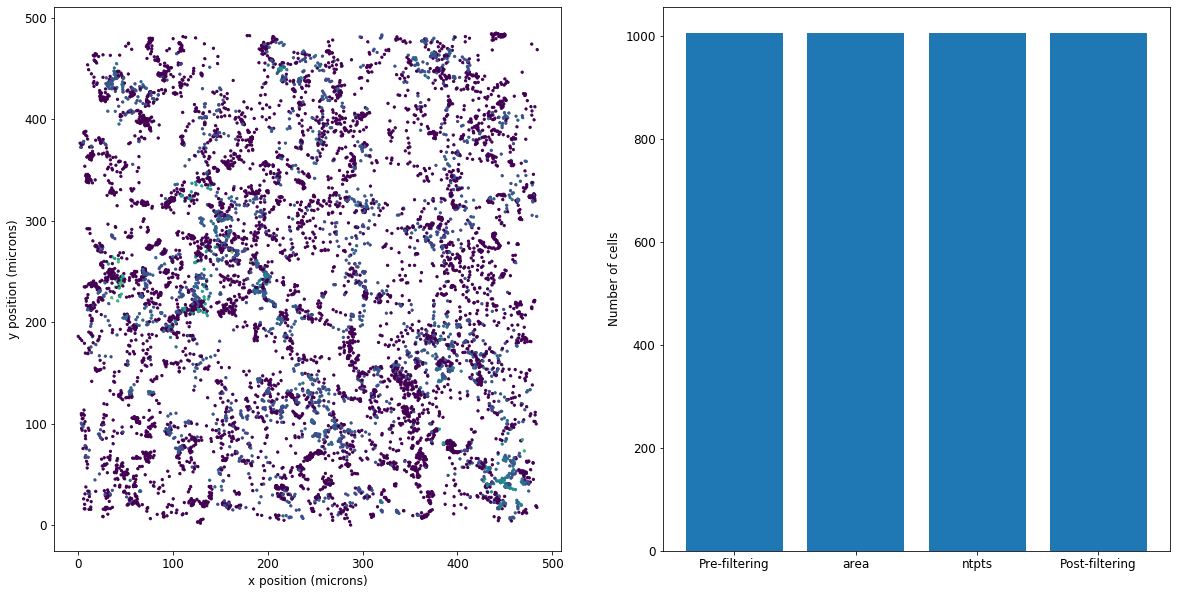

In [8]:
# User-defined filters in dict {factor:(min, max)}
data_filters = {
#   "speed": (10, 100),
  "area": (0, 10000), # Warning: range will change if self-normalized
  "ntpts": (0,1000)
}

# Returns a filtered dataframe, while also adding included column to comb_df
filt_df, filt_counts = cp.apply_filters(comb_df,filter_dict=data_filters)

fig = cp.visualize_filtering(comb_df, filt_counts)

# Time-averaged dataframe and summaries

In [9]:
''' To go into preprocessed conditional'''

if 'tavg_df' in locals():
    
    print('Using loaded tavg_df')
    
else: 
    # Process a time-averaged DataFrame
    tavg_df = cp.time_average(filt_df)
    
display(tavg_df)

Using loaded tavg_df


Unnamed: 0                          Cond_label  \
0              0  Condition_Day0_Stablized WTEL08_B5   
1              1  Condition_Day0_Stablized WTEL08_B5   
2              2  Condition_Day0_Stablized WTEL08_B5   
3              3  Condition_Day0_Stablized WTEL08_B5   
4              4  Condition_Day0_Stablized WTEL08_B5   
...          ...                                 ...   
1001        1001  Condition_Day7_Stablized WTEL08_B5   
1002        1002  Condition_Day7_Stablized WTEL08_B5   
1003        1003  Condition_Day7_Stablized WTEL08_B5   
1004        1004  Condition_Day7_Stablized WTEL08_B5   
1005        1005  Condition_Day7_Stablized WTEL08_B5   

                               Condition Condition_shortlabel        MSD  \
0     Condition_Day0_Stablized WTEL08_B5             WT Day 0   3.256475   
1     Condition_Day0_Stablized WTEL08_B5             WT Day 0   1.625551   
2     Condition_Day0_Stablized WTEL08_B5             WT Day 0   4.987127   
3     Condition_Day0_Stablized WTEL08_B5             WT Day 0  18.561833   
4     Condition_Day0_Stablized WTEL08_B5             WT Day 0  16.585796   
...                                  ...                  ...        ...   
1001  Condition_Day7_Stablized WTEL08_B5             WT Day 7  23.827557   
1002  Condition_Day7_Stablized WTEL08_B5             WT Day 7  65.130268   
1003  Condition_Day7_Stablized WTEL08_B5             WT Day 7   1.514795   
1004  Condition_Day7_Stablized WTEL08_B5             WT Day 7   3.545508   
1005  Condition_Day7_Stablized WTEL08_B5             WT Day 7  38.478422   

      Rep_label                                Replicate_ID  \
0           0.0  Day0_Stablized WTEL08_B5_1_mask_avg_tracks   
1           0.0  Day0_Stablized WTEL08_B5_1_mask_avg_tracks   
2           0.0  Day0_Stablized WTEL08_B5_1_mask_avg_tracks   
3           0.0  Day0_Stablized WTEL08_B5_1_mask_avg_tracks   
4           0.0  Day0_Stablized WTEL08_B5_1_mask_avg_tracks   
...         ...                                         ...   
1001        5.0  Day7_Stablized WTEL08_B5_3_mask_avg_tracks   
1002        5.0  Day7_Stablized WTEL08_B5_3_mask_avg_tracks   
1003        5.0  Day7_Stablized WTEL08_B5_3_mask_avg_tracks   
1004        5.0  Day7_Stablized WTEL08_B5_3_mask_avg_tracks   
1005        5.0  Day7_Stablized WTEL08_B5_3_mask_avg_tracks   

     Replicate_shortlabel         _       area  ...  turn_angle       uniq_id  \
0              WT Day 0_0  0.000000  57.542723  ...    8.229688  0.000000e+00   
1              WT Day 0_0  0.080000  51.122056  ...    9.462928  1.212121e+47   
2              WT Day 0_0  0.142857  34.254118  ...  -24.072921  2.886003e+25   
3              WT Day 0_0  0.178571  24.737941  ...    4.463808  2.525253e+53   
4              WT Day 0_0  0.000000  19.705215  ...  -19.751802  2.693600e+04   
...                   ...       ...        ...  ...         ...           ...   
1001           WT Day 7_2  0.000000  19.320723  ...   16.925341  5.141800e+04   
1002           WT Day 7_2  0.000000  39.218184  ...  -21.471490  5.142400e+04   
1003           WT Day 7_2  0.000000  29.125269  ...   22.498604  5.142500e+04   
1004           WT Day 7_2  0.000000  23.069520  ...   10.548470  5.143400e+04   
1005           WT Day 7_2  0.000000  30.855483  ...  -68.458326  5.143500e+04   

      unique_id           x       x_pix        x_um           y       y_pix  \
0           0.0  109.467841  109.467841  133.550766   16.987667   16.987667   
1           1.0   79.446074   79.446074   96.924210  262.574783  262.574783   
2           2.0  384.439678  384.439678  469.016407   43.127664   43.127664   
3           3.0   36.933208   36.933208   45.058514  195.650752  195.650752   
4           4.0   20.733061   20.733061   25.294335  182.176778  182.176778   
...         ...         ...         ...         ...         ...         ...   
1001     1001.0  183.507462  183.507462  223.879103  259.044769  259.044769   
1002     1002.0  285.191162  285.191162  347.933218  305.0

In [10]:
# Average, n per condition
factor = 'area'
cp.stats_table(tavg_df, factor)

Returning stats_table using test:  st.ttest_ind  for factor:  area
Note: for exploratory purposes only, no multiple comparison correction is being applied.


Condition_Day0_Stablized WTEL08_B5  \
Condition_Day0_Stablized WTEL08_B5                                 NaN   
Condition_Day7_Stablized WTEL08_B5                            0.415602   

                                    Condition_Day7_Stablized WTEL08_B5  
Condition_Day0_Stablized WTEL08_B5                            0.415602  
Condition_Day7_Stablized WTEL08_B5                                 NaN

In [11]:
# Time-averaged plots of differences
ctl_label = cp.CONDITIONS_TO_INCLUDE[0]

cp.plots_of_differences_plotly(tavg_df, factor=factor, ctl_label=ctl_label)#, ='CTL_LABEL')

WT Day 7 vs WT Day 0: P = 0.416
P =  0.41560159209837255  (Using t-test without multiple comparison correction)
------


In [12]:
# Time-averaged superplots
cp.superplots_plotly(tavg_df, factor, t='timeaverage')

In [13]:

# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df = cp.average_per_condition(tavg_df)

# Per replicate
repavg_df = cp.average_per_condition(tavg_df, avg_per_rep=True)


In [14]:
# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df,std,n = cp.average_per_condition(tavg_df, avg_per_rep=False)

# display(avg_df)
# display(std)
# display(n)

In [15]:
cond_stats = cp.average_per_condition(tavg_df, avg_per_rep=False)
cp.comparative_bar(cond_stats, x='Condition', y=factor, to_plot='avg',title='_per_condition_')

In [16]:
# Average, n per replicate
rep_stats = cp.average_per_condition(tavg_df, avg_per_rep=True)
cp.comparative_bar(rep_stats, x='Replicate_ID', y=factor, to_plot='avg', title='_per_replicate_')

# Dimensionality Reduction

In [17]:
# comb_df = filt_df

In [18]:
# Before running dr_pipeline, check if the file already exists in the local namespace
if 'dr_df' in locals():
    
    print('Using loaded dr_df')
    
else: 

    dr_df = cp.dr_pipeline(comb_df, dr_factors=cp.DR_FACTORS) 

Using loaded dr_df


In [19]:
pca_df, components, expl = cp.do_pca(comb_df[cp.DR_FACTORS])

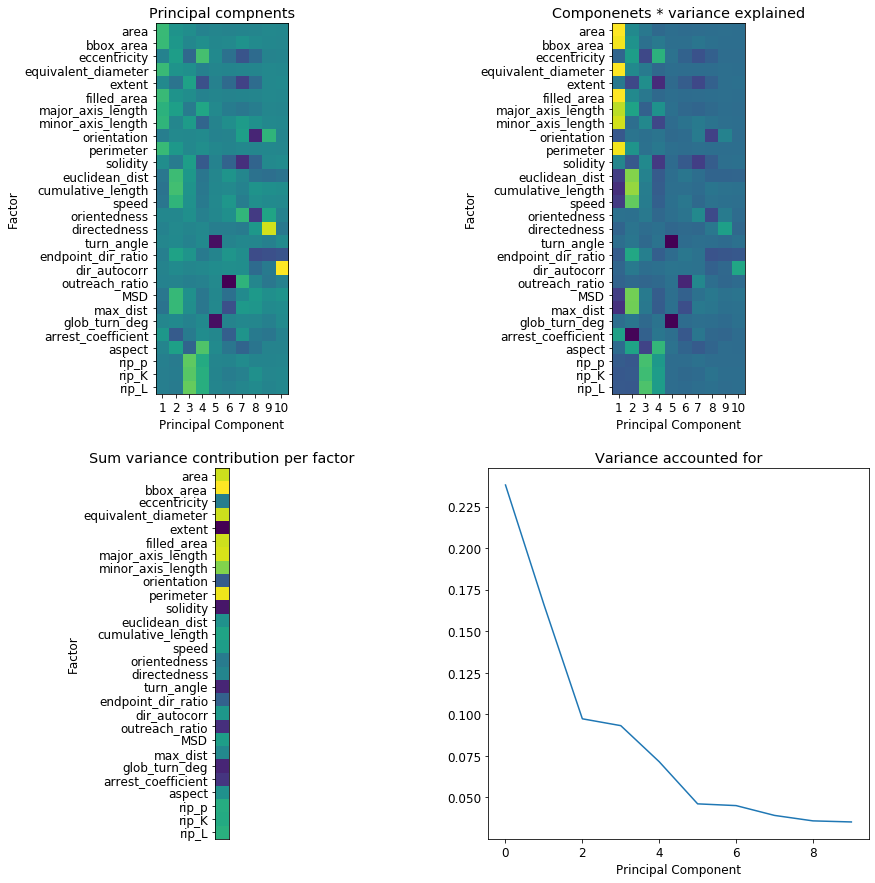

In [20]:
f = cp.pca_factor_vis(dr_df,pca_tuple=[pca_df, components, expl])#cp.DR_FACTORS)

['WT Day 0' 'WT Day 7']


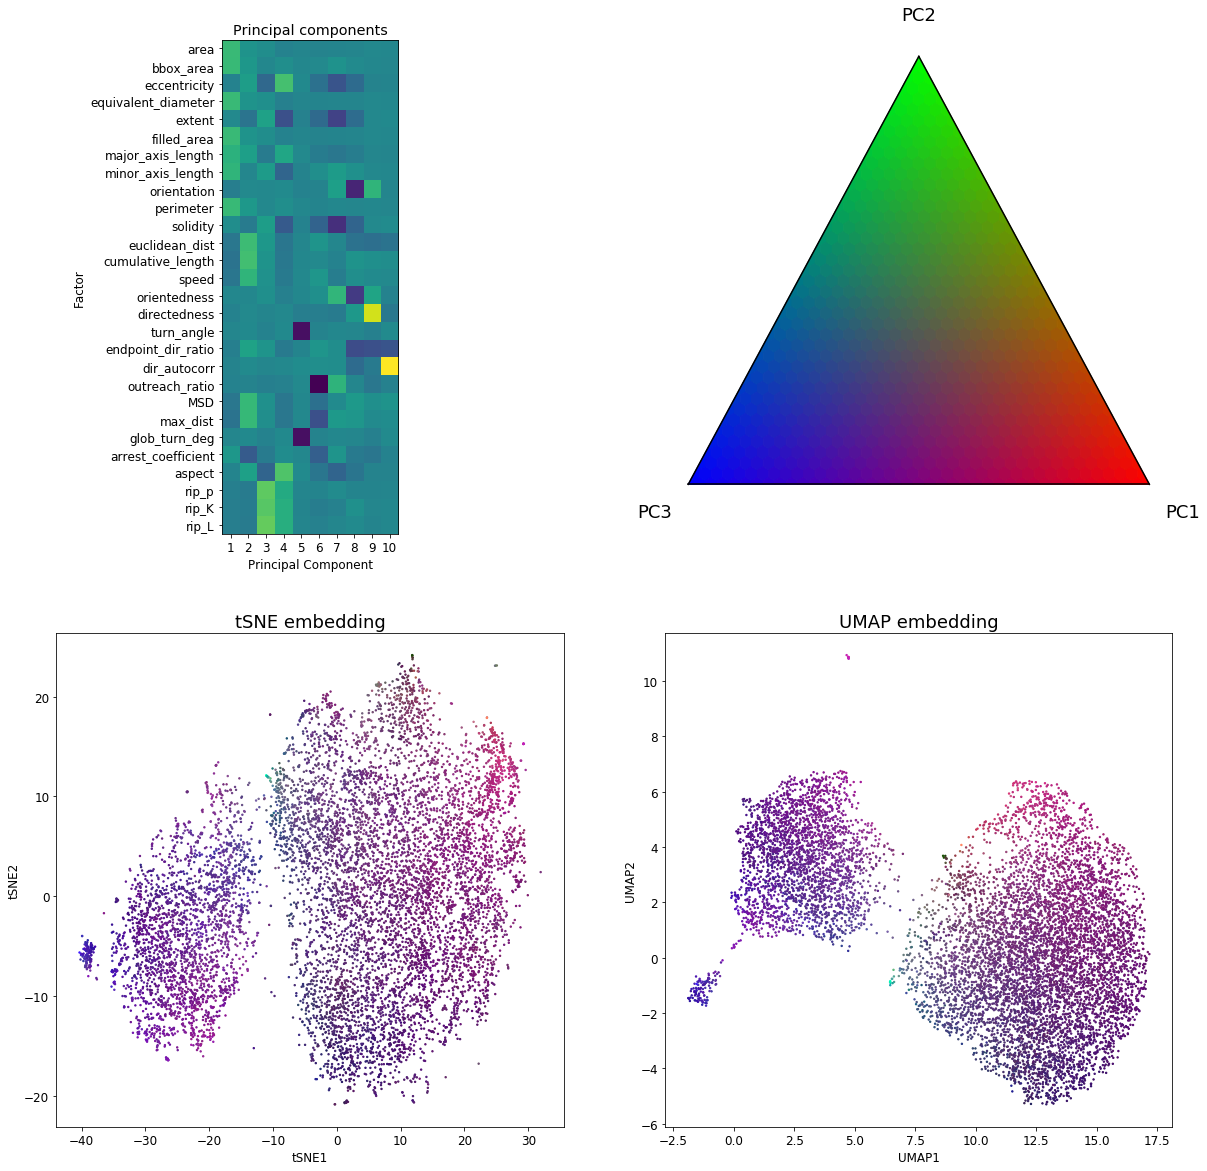

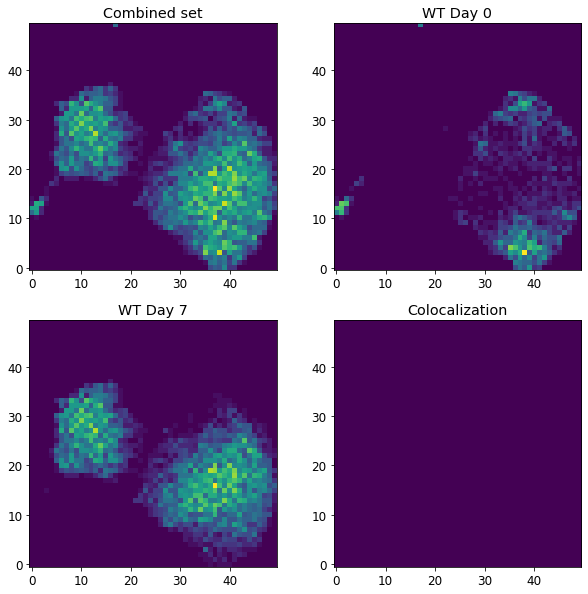

In [21]:
f=cp.dimension_reduction_subplots(dr_df,pca_tuple=[pca_df, components, expl])
f=cp.spatial_img_coloc(dr_df, xy='umap',thresh=10,n_bins=50)

##### Dissect the lowd embedding by conditions

In [22]:
# sub_df_1 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('20x')]
# sub_df_2 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('100x')]

# xy = 'UMAP'
# f1=vis.spatial_img_coloc(sub_df_1, xy=xy,thresh=20,n_bins=100)
# f2=vis.spatial_img_coloc(sub_df_2, xy=xy,thresh=20,n_bins=100)

In [23]:
# sub_df_1 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('WT')]
# sub_df_2 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('KO')]

# xy = 'UMAP'
# f1=vis.spatial_img_coloc(sub_df_1, xy=xy,thresh=20,n_bins=100)
# f2=vis.spatial_img_coloc(sub_df_2, xy=xy,thresh=20,n_bins=100)

  6%|█████▏                                                                            | 1/16 [00:00<00:01,  7.87it/s]

loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_1_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_2_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


 44%|███████████████████████████████████▉                                              | 7/16 [00:00<00:00, 18.89it/s]

coords.shape:  (1717, 5)
seg.shape:  (98, 400, 400)
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_3_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (1621, 5)
seg.shape:  (98, 400, 400)
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_1_mask_avg_tracks
2D track with zero as z component. Forcing STC

 56%|██████████████████████████████████████████████▏                                   | 9/16 [00:00<00:00, 19.24it/s]


h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (5324, 5)
seg.shape:  (60, 400, 400)
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_2_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (6553, 5)
seg.shape:  (60, 400, 400)


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 21.80it/s]


loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_3_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (8210, 5)
seg.shape:  (60, 400, 400)


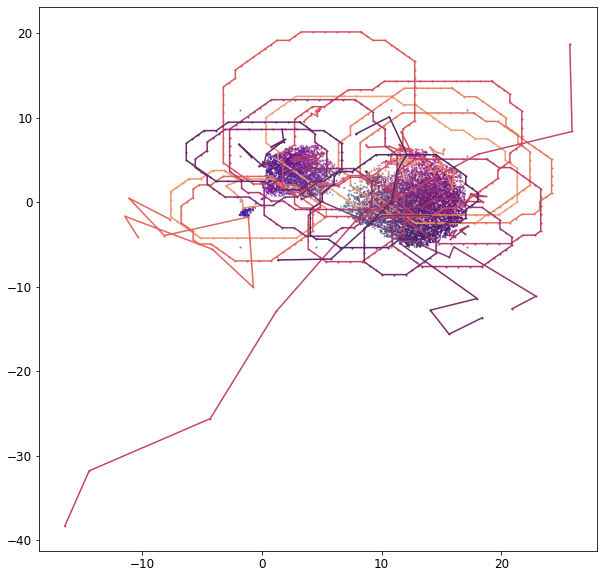

In [24]:
cp.dr_contour_matrix(dr_df,n_grid_pts=4, dr_method='umap',t_window=8) # dr_method='umap'

  3%|██▎                                                                               | 1/36 [00:00<00:04,  7.25it/s]

loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_1_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_2_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


 22%|██████████████████▏                                                               | 8/36 [00:00<00:01, 21.14it/s]

coords.shape:  (1717, 5)
seg.shape:  (98, 400, 400)
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_3_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (1621, 5)
seg.shape:  (98, 400, 400)
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_1_mask_avg_tracks


 31%|████████████████████████▊                                                        | 11/36 [00:00<00:01, 23.20it/s]

2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (5324, 5)
seg.shape:  (60, 400, 400)
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_2_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


100%|█████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 41.00it/s]

coords.shape:  (6553, 5)
seg.shape:  (60, 400, 400)
loading:  Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_3_mask_avg_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (8210, 5)
seg.shape:  (60, 400, 400)


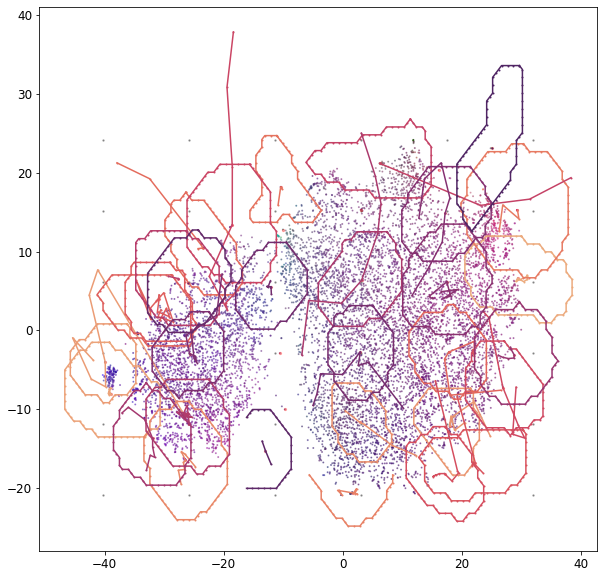

In [25]:
cp.dr_contour_matrix(dr_df,n_grid_pts=6, dr_method='tSNE',t_window=8) # dr_method='umap'

### Cluster the cell behaviour

hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by UMAP...


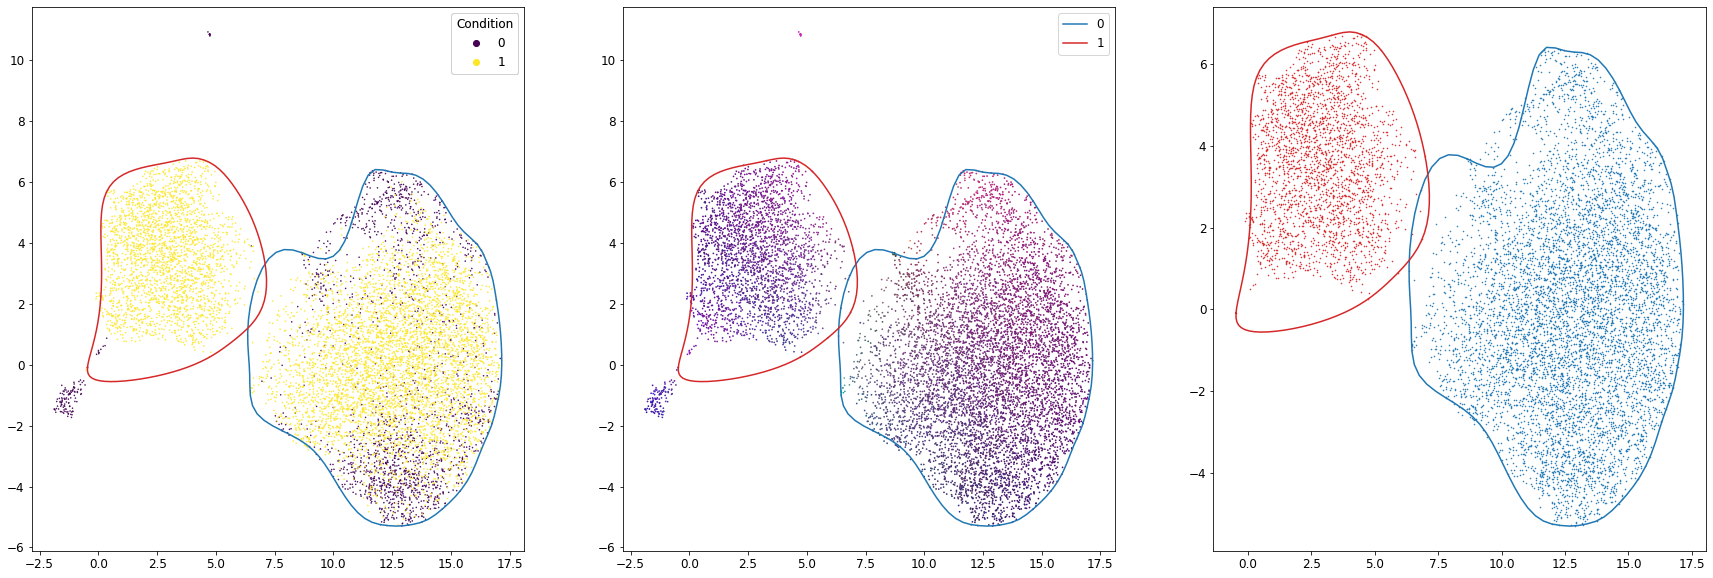

In [26]:

dr_method = cp.CLUSTER_BY

lab_dr_df = cp.hdbscan_clustering(dr_df, cluster_by=dr_method, plot=False)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[30,10])
cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='condition',ax=ax1,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'condition')
cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='PCs',ax=ax2,legend=True,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'pca')
cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='cluster',ax=ax3,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'cluster')


##### Save files to shared folder for reopening in other notebooks and reusing with future analysis

In [27]:
# # Save dr_df to shared data folder
# dr_df.to_csv(SAVED_DATA_PATH + 'dr_df.csv')

# # Save comb_df to shared data folder
# lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')

In [28]:
'''
Note another issue of cyclic dependencies here.
'''

'\nNote another issue of cyclic dependencies here.\n'

Defining trajectories using: ( UMAP1 UMAP2 )
Completed distance matrix, shape:  (292, 292)
Determined maximum number of clusters where eps =   2.0


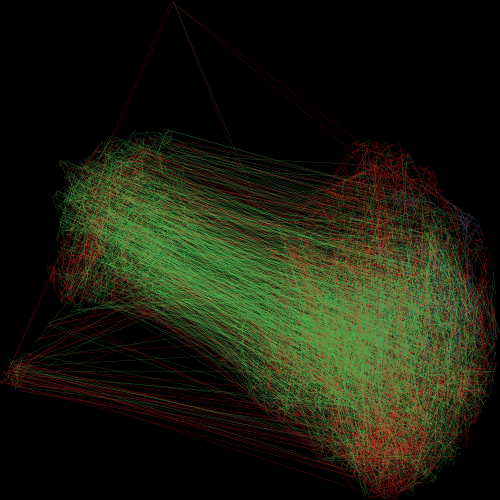

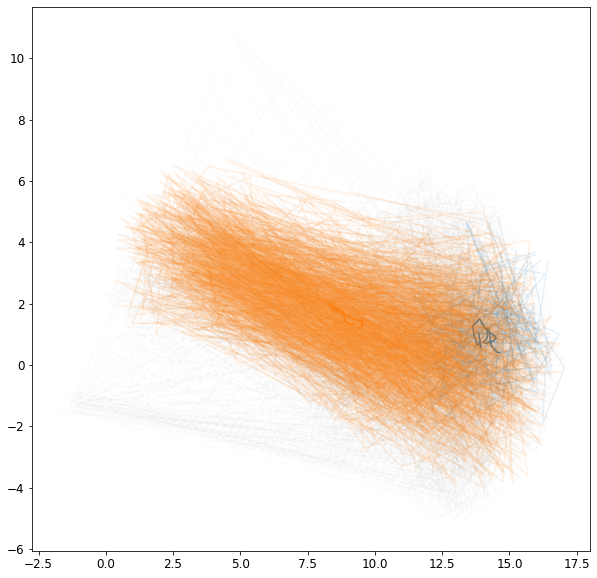

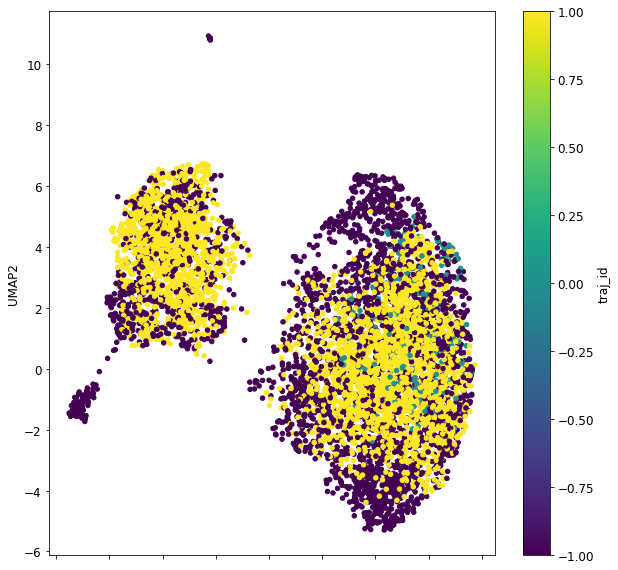

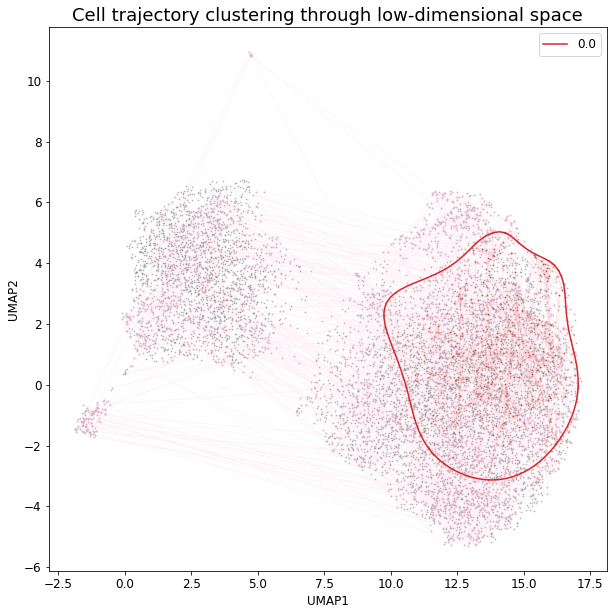

In [29]:
# Run the trajectory clustering pipeline
lab_dr_df, traj_list, cluster_lst = cp.trajectory_clustering_pipeline(lab_dr_df, traj_factor='umap', dist_metric='hausdorff', filename_out='std_dr_df_traj')

cp.plot_traj_cluster_avg(traj_list, cluster_lst, label='')
cp.trajectory_cluster_vis(lab_dr_df,traj_factor='umap', scatter=True)
cp.datashader_lines(lab_dr_df, 'UMAP1', 'UMAP2',color_by='traj_id', categorical=True, identifier='traj_id')

# Overwrite saved lab_dr_df
# lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')


### Cluster switching analysis

In [30]:
# Count the cluster changes
sum_labels, tptlabel_dr_df = cp.count_cluster_changes(lab_dr_df)
display(sum_labels)

cp.time_superplot(tptlabel_dr_df, 'n_changes',t_window=None)

Condition  \
0     Condition_Day0_Stablized WTEL08_B5   
1     Condition_Day0_Stablized WTEL08_B5   
2     Condition_Day0_Stablized WTEL08_B5   
3     Condition_Day0_Stablized WTEL08_B5   
4     Condition_Day0_Stablized WTEL08_B5   
...                                  ...   
1001  Condition_Day7_Stablized WTEL08_B5   
1002  Condition_Day7_Stablized WTEL08_B5   
1003  Condition_Day7_Stablized WTEL08_B5   
1004  Condition_Day7_Stablized WTEL08_B5   
1005  Condition_Day7_Stablized WTEL08_B5   

                                       Replicate Cell_ID  n_changes  n_labels  
0     Day0_Stablized WTEL08_B5_1_mask_avg_tracks     0_0          0         1  
1     Day0_Stablized WTEL08_B5_1_mask_avg_tracks     0_3          0         1  
2     Day0_Stablized WTEL08_B5_1_mask_avg_tracks     0_4          0         1  
3     Day0_Stablized WTEL08_B5_1_mask_avg_tracks     0_7          2         2  
4     Day0_Stablized WTEL08_B5_1_mask_avg_tracks     0_8          0         1  
...                                          ...     ...        ...       ...  
1001  Day7_Stablized WTEL08_B5_3_mask_avg_tracks  5_1418          0         1  
1002  Day7_Stablized WTEL08_B5_3_mask_avg_tracks  5_1424          0         1  
1003  Day7_Stablized WTEL08_B5_3_mask_avg_tracks  5_1425          0         1  
1004  Day7_Stablized WTEL08_B5_3_mask_avg_tracks  5_1434          0         1  
1005  Day7_Stablized WTEL08_B5_3_mask_avg_tracks  5_1435          0         1  

[1006 rows x 5 columns]

### Cluster Purity

In [31]:
clust_sum_df = cp.cluster_purity(lab_dr_df) 
display(clust_sum_df)
trajclust_sum_df = cp.cluster_purity(lab_dr_df, cluster_label='traj_id')
display(trajclust_sum_df)

cluster_id  WT Day 0_ntpts  WT Day 0_ntpts_%  WT Day 0_ncells  \
0         0.0          1774.0         26.351753            197.0   
1         1.0             6.0          0.241838              4.0   
2         2.0           105.0         99.056604             22.0   

   WT Day 0_ncells_%  WT Day 7_ntpts  WT Day 7_ntpts_%  WT Day 7_ncells  \
0          22.060470          4958.0         73.648247            696.0   
1           0.938967          2475.0         99.758162            422.0   
2          95.652174             1.0          0.943396              1.0   

   WT Day 7_ncells_%  
0          77.939530  
1          99.061033  
2           4.347826

cluster_id  WT Day 0_ntpts  WT Day 0_ntpts_%  WT Day 0_ncells  \
0.0         0.0            85.0          32.19697              3.0   
1.0         1.0             0.0           0.00000              0.0   

     WT Day 0_ncells_%  WT Day 7_ntpts  WT Day 7_ntpts_%  WT Day 7_ncells  \
0.0               20.0           179.0          67.80303             12.0   
1.0                0.0          3077.0         100.00000            134.0   

     WT Day 7_ncells_%  
0.0               80.0  
1.0              100.0

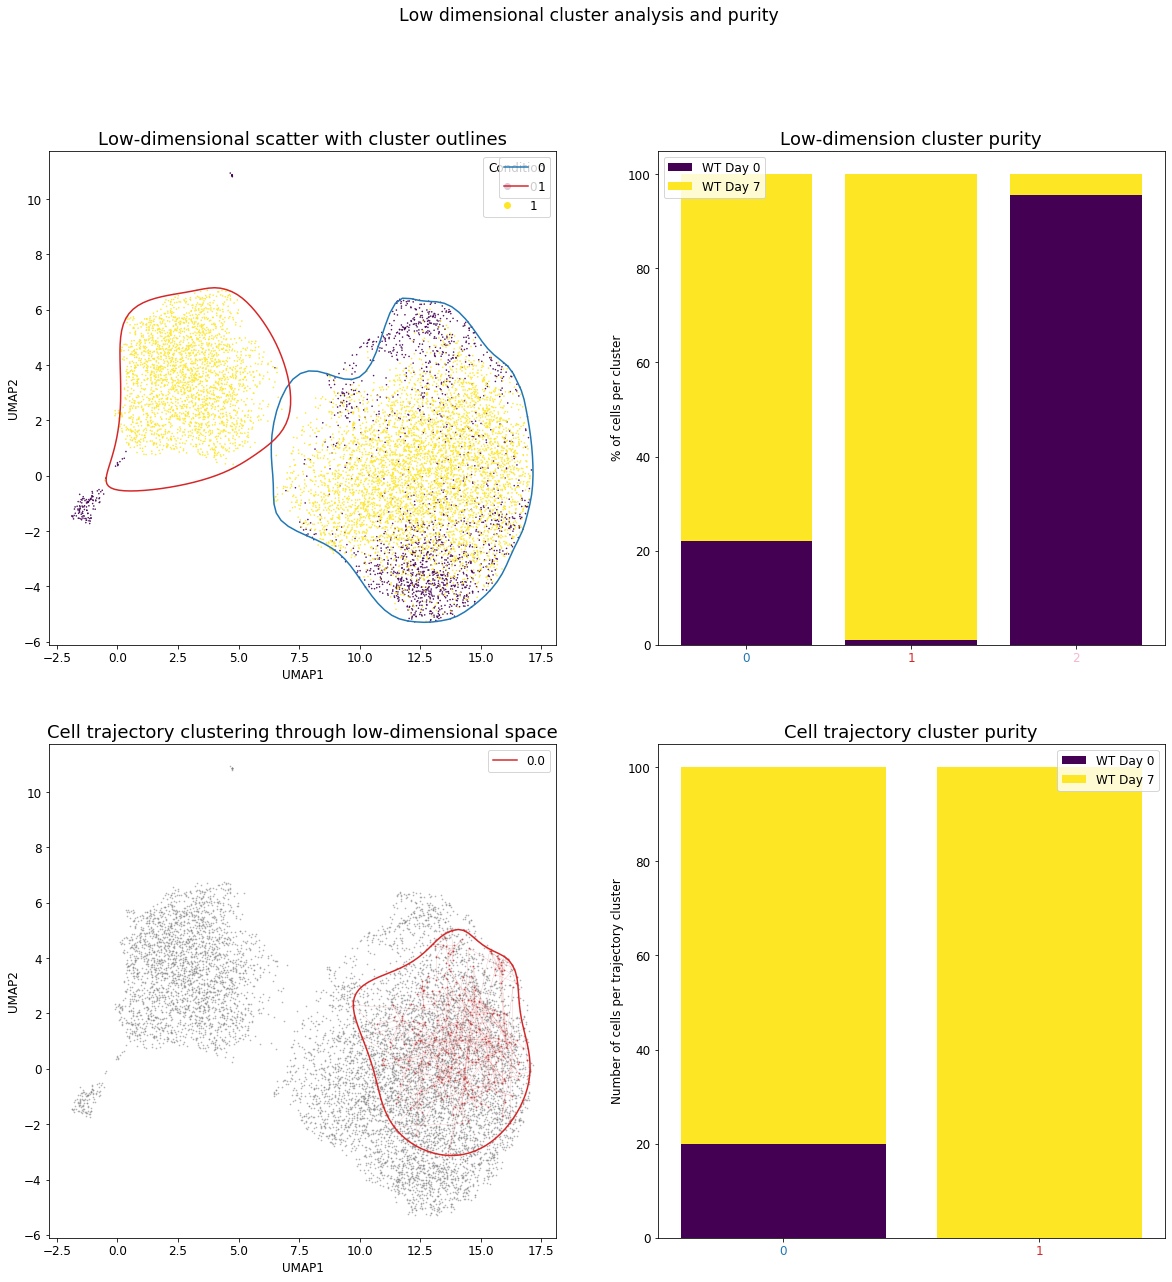

In [32]:
'''Note: accepts multiple dataframe inputs, could accept just one..'''
f = cp.purity_plots(lab_dr_df, clust_sum_df,lab_dr_df,trajclust_sum_df)

In [33]:
clust_sum_t_df = cp.cluster_composition_timecourse(lab_dr_df)
cp.cluster_timeplot(clust_sum_t_df)

In [34]:
# Count the number of cells that fall into each cluster - show on per condition and replicate basis.
lab_count_df = cp.get_label_counts(lab_dr_df, per_rep=True)

# Plot the counts per subgroup in a swarm plot
fig = px.strip(lab_count_df, x="label", y="count", color="Condition")
fig.show()

In [35]:
if OVERWRITE_DATAFRAMES:
    # Save dataframes to shared data folder
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')